# Loading of Data

In [1]:
# prompt: load the dataset from a Google Drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Load the dataset from a Google Drive file
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Twitter_Analysis.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data.head()

Unnamed: 0  majority_target  \
0           0             True   
1           1             True   
2           2             True   
3           3             True   
4           4             True   

                                           statement  BinaryNumTarget  \
0  End of eviction moratorium means millions of A...              1.0   
1  End of eviction moratorium means millions of A...              1.0   
2  End of eviction moratorium means millions of A...              1.0   
3  End of eviction moratorium means millions of A...              1.0   
4  End of eviction moratorium means millions of A...              1.0   

                                               tweet  followers_count  \
0  @POTUS Biden Blunders - 6 Month Update\n\nInfl...           4262.0   
1  @S0SickRick @Stairmaster_ @6d6f636869 Not as m...           1393.0   
2  THE SUPREME COURT is siding with super rich pr...              9.0   
3  @POTUS Biden Blunders\n\nBroken campaign promi...           4262.0   
4  @OhComfy I agree. The confluence of events rig...             70.0   

   friends_count  favourites_count  statuses_count  listed_count  ...  \
0         3619.0           34945.0         16423.0          44.0  ...   
1         1621.0           31436.0         37184.0          64.0  ...   
2           84.0             219.0          1184.0           0.0  ...   
3         3619.0           34945.0         16423.0          44.0  ...   
4          166.0           15282.0          2194.0           0.0  ...   

   determiners conjunctions  dots  exclamation  questions  ampersand  \
0            0            0     5            0          1          0   
1            0            2     1            0          0          0   
2            0            1     0            0          0          0   
3            0            1     3            0          0          1   
4            0            1     3            0          1          0   

   capitals  digits  long_word_freq  short_word_freq  
0        33       3               5               19  
1        14       0               2               34  
2         3       0               4               10  
3         6       8               1               30  
4        11       3               2               19  

[5 rows x 64 columns]

# Pre-Processing

In [4]:
!pip install pycaret

In [5]:
import numpy as np
import pandas as pd
import pycaret
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# specify GPU
device = torch.device("cuda")

In [ ]:
# prompt: view the head of data

data.head()



Unnamed: 0  majority_target  \
0           0             True   
1           1             True   
2           2             True   
3           3             True   
4           4             True   

                                           statement  BinaryNumTarget  \
0  End of eviction moratorium means millions of A...              1.0   
1  End of eviction moratorium means millions of A...              1.0   
2  End of eviction moratorium means millions of A...              1.0   
3  End of eviction moratorium means millions of A...              1.0   
4  End of eviction moratorium means millions of A...              1.0   

                                               tweet  followers_count  \
0  @POTUS Biden Blunders - 6 Month Update\n\nInfl...           4262.0   
1  @S0SickRick @Stairmaster_ @6d6f636869 Not as m...           1393.0   
2  THE SUPREME COURT is siding with super rich pr...              9.0   
3  @POTUS Biden Blunders\n\nBroken campaign promi...           4262.0   
4  @OhComfy I agree. The confluence of events rig...             70.0   

   friends_count  favourites_count  statuses_count  listed_count  ...  \
0         3619.0           34945.0         16423.0          44.0  ...   
1         1621.0           31436.0         37184.0          64.0  ...   
2           84.0             219.0          1184.0           0.0  ...   
3         3619.0           34945.0         16423.0          44.0  ...   
4          166.0           15282.0          2194.0           0.0  ...   

   determiners conjunctions  dots  exclamation  questions  ampersand  \
0            0            0     5            0          1          0   
1            0            2     1            0          0          0   
2            0            1     0            0          0          0   
3            0            1     3            0          0          1   
4            0            1     3            0          1          0   

   capitals  digits  long_word_freq  short_word_freq  
0        33       3               5               19  
1        14       0               2               34  
2         3       0               4               10  
3         6       8               1               30  
4        11       3               2               19  

[5 rows x 64 columns]

In [6]:
# prompt: remove url and make texts in a field in the dataset in lowercase

import re

# Remove URL
data['tweet'] = data['tweet'].apply(lambda x: re.sub(r'http\S+', ' ', x))

data.head()


Unnamed: 0  majority_target  \
0           0             True   
1           1             True   
2           2             True   
3           3             True   
4           4             True   

                                           statement  BinaryNumTarget  \
0  End of eviction moratorium means millions of A...              1.0   
1  End of eviction moratorium means millions of A...              1.0   
2  End of eviction moratorium means millions of A...              1.0   
3  End of eviction moratorium means millions of A...              1.0   
4  End of eviction moratorium means millions of A...              1.0   

                                               tweet  followers_count  \
0  @POTUS Biden Blunders - 6 Month Update\n\nInfl...           4262.0   
1  @S0SickRick @Stairmaster_ @6d6f636869 Not as m...           1393.0   
2  THE SUPREME COURT is siding with super rich pr...              9.0   
3  @POTUS Biden Blunders\n\nBroken campaign promi...           4262.0   
4  @OhComfy I agree. The confluence of events rig...             70.0   

   friends_count  favourites_count  statuses_count  listed_count  ...  \
0         3619.0           34945.0         16423.0          44.0  ...   
1         1621.0           31436.0         37184.0          64.0  ...   
2           84.0             219.0          1184.0           0.0  ...   
3         3619.0           34945.0         16423.0          44.0  ...   
4          166.0           15282.0          2194.0           0.0  ...   

   determiners conjunctions  dots  exclamation  questions  ampersand  \
0            0            0     5            0          1          0   
1            0            2     1            0          0          0   
2            0            1     0            0          0          0   
3            0            1     3            0          0          1   
4            0            1     3            0          1          0   

   capitals  digits  long_word_freq  short_word_freq  
0        33       3               5               19  
1        14       0               2               34  
2         3       0               4               10  
3         6       8               1               30  
4        11       3               2               19  

[5 rows x 64 columns]

In [7]:
# prompt: split contractions in the tweet texts

# Split contractions in the tweet texts
data['tweet'] = data['tweet'].apply(lambda x: re.sub(r"can't", "cannot", x))
data['tweet'] = data['tweet'].apply(lambda x: re.sub(r"n't", "not", x))
data['tweet'] = data['tweet'].apply(lambda x: re.sub(r"i'm", "i am", x))
data['tweet'] = data['tweet'].apply(lambda x: re.sub(r"I'm", "I am", x))
data['tweet'] = data['tweet'].apply(lambda x: re.sub(r"'re", "are", x))
data['tweet'] = data['tweet'].apply(lambda x: re.sub(r"'s", "is", x))
data['tweet'] = data['tweet'].apply(lambda x: re.sub(r"'d", "would", x))
data['tweet'] = data['tweet'].apply(lambda x: re.sub(r"'ll", "will", x))
data['tweet'] = data['tweet'].apply(lambda x: re.sub(r"'ve", "have", x))

data.head()


Unnamed: 0  majority_target  \
0           0             True   
1           1             True   
2           2             True   
3           3             True   
4           4             True   

                                           statement  BinaryNumTarget  \
0  End of eviction moratorium means millions of A...              1.0   
1  End of eviction moratorium means millions of A...              1.0   
2  End of eviction moratorium means millions of A...              1.0   
3  End of eviction moratorium means millions of A...              1.0   
4  End of eviction moratorium means millions of A...              1.0   

                                               tweet  followers_count  \
0  @POTUS Biden Blunders - 6 Month Update\n\nInfl...           4262.0   
1  @S0SickRick @Stairmaster_ @6d6f636869 Not as m...           1393.0   
2  THE SUPREME COURT is siding with super rich pr...              9.0   
3  @POTUS Biden Blunders\n\nBroken campaign promi...           4262.0   
4  @OhComfy I agree. The confluence of events rig...             70.0   

   friends_count  favourites_count  statuses_count  listed_count  ...  \
0         3619.0           34945.0         16423.0          44.0  ...   
1         1621.0           31436.0         37184.0          64.0  ...   
2           84.0             219.0          1184.0           0.0  ...   
3         3619.0           34945.0         16423.0          44.0  ...   
4          166.0           15282.0          2194.0           0.0  ...   

   determiners conjunctions  dots  exclamation  questions  ampersand  \
0            0            0     5            0          1          0   
1            0            2     1            0          0          0   
2            0            1     0            0          0          0   
3            0            1     3            0          0          1   
4            0            1     3            0          1          0   

   capitals  digits  long_word_freq  short_word_freq  
0        33       3               5               19  
1        14       0               2               34  
2         3       0               4               10  
3         6       8               1               30  
4        11       3               2               19  

[5 rows x 64 columns]

# Training-Testing-Validation Splitting

In [8]:
# Train-Validation-Test set split into 70:15:15 ratio
# Train-Temp split
train_text, temp_text, train_labels, temp_labels = train_test_split(data['tweet'], data['BinaryNumTarget'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=data['majority_target'])
# Validation-Test split

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.5,
                                                                stratify=temp_labels)
temp_labels.head()

59105     1.0
111976    0.0
31253     1.0
118328    0.0
62880     1.0
Name: BinaryNumTarget, dtype: float64

# Bert Model

In [9]:
# Load BERT model and tokenizer via HuggingFace Transformers
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Text(0, 0.5, 'Number of texts')

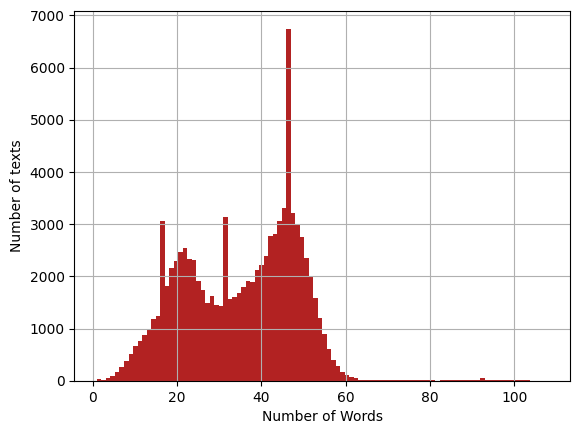

In [10]:
# Plot histogram of the number of words in train data 'tweet'
seq_len = [len(tweet.split()) for tweet in train_text]

pd.Series(seq_len).hist(bins = 100,color='firebrick')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [11]:
# Majority of titles above have word length under 60. So, we set max title length as 60
MAX_LENGHT = 60
# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

In [12]:
# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [13]:
# Data Loader structure definition
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32                                               #define a batch size

train_data = TensorDataset(train_seq, train_mask, train_y)    # wrap tensors
train_sampler = RandomSampler(train_data)                     # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
                                                              # dataLoader for train set
val_data = TensorDataset(val_seq, val_mask, val_y)            # wrap tensors
val_sampler = SequentialSampler(val_data)                     # sampler for sampling the data during training
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
                                                              # dataLoader for validation set

In [14]:
# Freezing the parameters and defining trainable BERT structure
for param in bert.parameters():
    param.requires_grad = False    # false here means gradient need not be computed

In [15]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):
      super(BERT_Arch, self).__init__()
      self.bert = bert
      self.dropout = nn.Dropout(0.1)            # dropout layer
      self.relu =  nn.ReLU()                    # relu activation function
      self.fc1 = nn.Linear(768,512)             # dense layer 1
      self.fc2 = nn.Linear(512,2)               # dense layer 2 (Output layer)
      self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function
    def forward(self, sent_id, mask):           # define the forward pass
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
                                                # pass the inputs to the model
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)                           # output layer
      x = self.softmax(x)                       # apply softmax activation
      return x

model = BERT_Arch(bert)
# Defining the hyperparameters (optimizer, weights of the classes and the epochs)
# Define the optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate
# Define the loss function
#cross_entropy  = nn.NLLLoss()
cross_entropy = torch.nn.NLLLoss()
# Number of training epochs
epochs = 2

In [16]:
# Defining training and evaluation functions
def train():
  model.train()
  total_loss, total_accuracy = 0, 0

  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 50 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  # push the batch to gpu
    sent_id, mask, labels = batch
    model.zero_grad()                                           # clear previously calculated gradients
    preds = model(sent_id, mask)
    labels = torch.tensor(labels, dtype=torch.long)                               # get model predictions for current batch
    loss = cross_entropy(preds, labels)                         # compute loss between actual & predicted values
    total_loss = total_loss + loss.item()                       # add on to the total loss
    loss.backward()                                             # backward pass to calculate the gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)     # clip gradients to 1.0. It helps in preventing exploding gradient problem
    optimizer.step()                                            # update parameters
    preds=preds.detach().cpu().numpy()                          # model predictions are stored on GPU. So, push it to CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch
                                                                # reshape predictions in form of (# samples, # classes)
  return avg_loss                                 # returns the loss and predictions

def evaluate():
  print("\nEvaluating...")
  model.eval()  # Deactivate dropout layers

  total_loss, total_accuracy = 0, 0
  for step, batch in enumerate(val_dataloader):  # Iterate over batches
    if step % 50 == 0 and not step == 0:
      # Progress update every 50 batches.
      # Elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,} of {:>5,}.'.format(step, len(val_dataloader)))
      # Report progress

    batch = [t for t in batch]  # Push the batch to GPU
    sent_id, mask, labels = batch

    with torch.no_grad():  # Deactivate autograd
      preds = model(sent_id, mask)  # Model predictions

      # Convert labels to long tensors if necessary (assuming labels are currently not long tensors)
      if not isinstance(labels, torch.LongTensor):
        labels = labels.long()

      loss = cross_entropy(preds, labels)  # Compute the validation loss

      total_loss += loss.item()
      preds = preds.detach().cpu().numpy()

  avg_loss = total_loss / len(val_dataloader)  # Compute the validation loss of the epoch
  return avg_loss





In [ ]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss:           # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'c2_new_models2_weights.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')

In [26]:
import torch

# Define the model (make sure to define your model class if it's custom)
model = BERT_Arch(bert)

# Save the state dictionary
torch.save(model.state_dict(), '/content/drive/MyDrive/Colab_Notebooks/c2_new_models2_weights.pt')


# Prediction Using Unseen Data

In [36]:
import joblib
import torch
from transformers import BertTokenizer

# Load the tokenizer and the model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
joblib.dump([model, bert], '/content/drive/MyDrive/Colab_Notebooks/c2_new_models2_weights.pt')

def predict_fake_news(text):
    # Tokenize and encode sequences
    inputs = tokenizer.encode_plus(
        text,
        max_length=60,
        pad_to_max_length=True,
        truncation=True,
        return_tensors="pt"
    )

    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    # Make prediction
    model.eval()  # Ensure the model is in evaluation mode
    with torch.no_grad():
        outputs = model(input_ids, attention_mask)

    # Access the logits directly from the outputs Tensor
    logits = outputs[0]  # Assuming logits are the first element in the output tuple

    # Get the prediction using argmax
    prediction = torch.argmax(logits).item()

    # Map prediction to label
    label_map = {0: 'Real', 1: 'Fake'}
    return label_map[prediction]

# Test the model with a sample example
test_example = "Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing"
prediction = predict_fake_news(test_example)
print(f'The prediction for the test example is: {prediction}')

The prediction for the test example is: Fake


# Bi-LSTM Model

In [ ]:
print(data.columns.tolist())

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming your dataset is in a DataFrame called `data`
features = ['cred', 'BotScore', 'tweet']
target = 'BinaryNumTarget'

# Splitting the dataset into features and target
X = data[features]
y = data[target]

# Further splitting into training, validation, and test sets (70:15:15)
train_data, temp_data, train_labels, temp_labels = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2018)
val_data, test_data, val_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.5, stratify=temp_labels, random_state=2018)

# Tokenize and pad tweet texts for Bi-LSTM and CNN models
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data['tweet'])
train_sequences = tokenizer.texts_to_sequences(train_data['tweet'])
val_sequences = tokenizer.texts_to_sequences(val_data['tweet'])
test_sequences = tokenizer.texts_to_sequences(test_data['tweet'])

max_sequence_length = 100
train_padded = pad_sequences(train_sequences, maxlen=max_sequence_length)
val_padded = pad_sequences(val_sequences, maxlen=max_sequence_length)
test_padded = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Combine text sequences with other features
train_features = np.hstack((train_data[['cred', 'BotScore']].values, train_padded))
val_features = np.hstack((val_data[['cred', 'BotScore']].values, val_padded))
test_features = np.hstack((test_data[['cred', 'BotScore']].values, test_padded))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define Bi-LSTM model
bi_lstm_model = Sequential()
bi_lstm_model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
bi_lstm_model.add(LSTM(128, return_sequences=True))
bi_lstm_model.add(LSTM(64))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(1, activation='sigmoid'))

# Compile and train Bi-LSTM model
bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
bi_lstm_model.fit(train_padded, train_labels, epochs=5, batch_size=32, validation_data=(val_padded, val_labels))

Epoch 1/5


KeyboardInterrupt: 

630/630 [==============================] - 4s 5ms/step
Accuracy: 0.9805
F1 Score: 0.9811
Recall: 0.9873
Precision: 0.9750


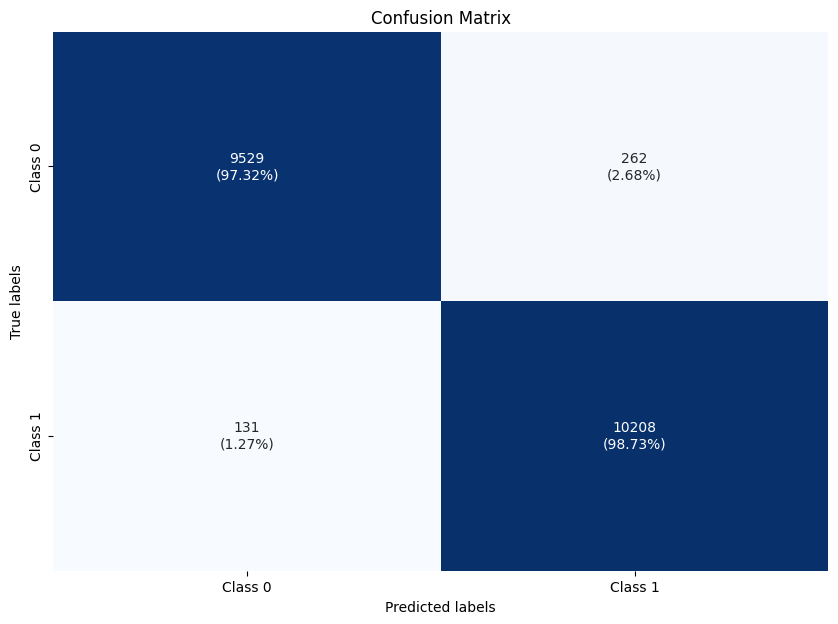

In [26]:
# prompt: Write a code to evaluate the performance of the saved model above based on accuracy, f1-score, recall and precision parameters in 4 decimal places. Add a confusion matrix to it. let the confusion matrix highlight percentage in addition to values

import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import seaborn as sns

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/Bi-LSTM-Model-1.h5')

# Predict on the test data
predictions = model.predict(test_padded)
predicted_labels = np.round(predictions)

# Calculate the performance metrics
accuracy = accuracy_score(test_labels, predicted_labels)
f1_score = f1_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels)

# Print the performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')

# Create a confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Normalize the confusion matrix by row (true labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create annotations with both counts and percentages
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_normalized[i, j]
        s = f'{c}\n({p:.2%})'
        annot[i, j] = s

# Plot the confusion matrix with annotations
plt.figure(figsize=(10, 7))
ax = sns.heatmap(cm_normalized, annot=annot, fmt='', cmap='Blues', cbar=False)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Adjust tick labels based on the shape of the confusion matrix
class_names = ['Class {}'.format(i) for i in range(cm.shape[0])]
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

plt.show()

# CNN Model

In [33]:
#CNN Model

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming your dataset is in a DataFrame called `data`
features = ['cred', 'BotScore', 'tweet']
target = 'BinaryNumTarget'

# Splitting the dataset into features and target
X = data[features]
y = data[target]

# Further splitting into training, validation, and test sets (70:15:15)
train_data, temp_data, train_labels, temp_labels = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2018)
val_data, test_data, val_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.5, stratify=temp_labels, random_state=2018)

# Tokenize and pad tweet texts for Bi-LSTM and CNN models
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data['tweet'])
train_sequences = tokenizer.texts_to_sequences(train_data['tweet'])
val_sequences = tokenizer.texts_to_sequences(val_data['tweet'])
test_sequences = tokenizer.texts_to_sequences(test_data['tweet'])

max_sequence_length = 100
train_padded = pad_sequences(train_sequences, maxlen=max_sequence_length)
val_padded = pad_sequences(val_sequences, maxlen=max_sequence_length)
test_padded = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Combine text sequences with other features
train_features = np.hstack((train_data[['cred', 'BotScore']].values, train_padded))
val_features = np.hstack((val_data[['cred', 'BotScore']].values, val_padded))
test_features = np.hstack((test_data[['cred', 'BotScore']].values, test_padded))

KeyboardInterrupt: 

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
cnn_model.add(Conv1D(128, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))
# Compile and train CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(train_padded, train_labels, epochs=5, batch_size=32, validation_data=(val_padded, val_labels))

In [ ]:
# prompt: Write a code to evaluate the performance of the saved model above based on accuracy, f1-score, recall and precision parameters in 4 decimal places. Add a confusion matrix to it. let the confusion matrix highlight percentage in addition to values

import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import seaborn as sns

# Load the saved model
model = tf.keras.models.load_model('CNN-Model-1.h5')

# Predict on the test data
predictions = model.predict(test_padded)
predicted_labels = np.round(predictions)

# Calculate the performance metrics
accuracy = accuracy_score(test_labels, predicted_labels)
f1_score = f1_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels)

# Print the performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')

# Create a confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Normalize the confusion matrix by row (true labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create annotations with both counts and percentages
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_normalized[i, j]
        s = f'{c}\n({p:.2%})'
        annot[i, j] = s

# Plot the confusion matrix with annotations
plt.figure(figsize=(10, 7))
ax = sns.heatmap(cm_normalized, annot=annot, fmt='', cmap='Blues', cbar=False)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Adjust tick labels based on the shape of the confusion matrix
class_names = ['Class {}'.format(i) for i in range(cm.shape[0])]
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

plt.show()


# Ensemble Model

In [ ]:
# prompt: Generate an ensemble model for combining only BiLSTM and CNN for training and evaluation from saved file

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate, Dense, GlobalAveragePooling1D

# Define input layers for each model
input_bilstm = Input(shape=(100,), name='input_bilstm')
input_cnn = Input(shape=(100,), name='input_cnn')

# Load the saved models
bilstm_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/Bi-LSTM-Model-1.h5')
cnn_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/CNN-Model-1.h5')

# Get outputs from each model
bilstm_output = bilstm_model(input_bilstm)
cnn_output = cnn_model(input_cnn)

# Concatenate the outputs
ensemble_output = Concatenate()([bilstm_output, cnn_output])

# Add a dense layer with sigmoid activation
ensemble_output = Dense(1, activation='sigmoid')(ensemble_output)

# Define the ensemble model
ensemble_model = Model(inputs=[input_bilstm, input_cnn], outputs=ensemble_output)

# Compile the model
ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ensemble_model.fit([train_padded, train_padded], train_labels, epochs=5, batch_size=32, validation_data=([val_padded, val_padded], val_labels))

# Save the model
ensemble_model.save('/content/drive/MyDrive/Colab_Notebooks/ensemble_model_bilstm_cnn.h5')


Epoch 1/5
2936/2936 [==============================] - 1159s 389ms/step - loss: 0.3232 - accuracy: 0.9037 - val_loss: 0.1407 - val_accuracy: 0.9787
Epoch 2/5
2936/2936 [==============================] - 1130s 385ms/step - loss: 0.0648 - accuracy: 0.9944 - val_loss: 0.0722 - val_accuracy: 0.9824
Epoch 3/5
2936/2936 [==============================] - 1112s 379ms/step - loss: 0.0204 - accuracy: 0.9981 - val_loss: 0.0620 - val_accuracy: 0.9831
Epoch 4/5
2936/2936 [==============================] - 1086s 370ms/step - loss: 0.0100 - accuracy: 0.9981 - val_loss: 0.0663 - val_accuracy: 0.9820
Epoch 5/5
2936/2936 [==============================] - 1095s 373ms/step - loss: 0.0055 - accuracy: 0.9988 - val_loss: 0.0697 - val_accuracy: 0.9821


630/630 [==============================] - 6s 8ms/step
Accuracy: 0.9824
F1 Score: 0.9828
Recall: 0.9814
Precision: 0.9842


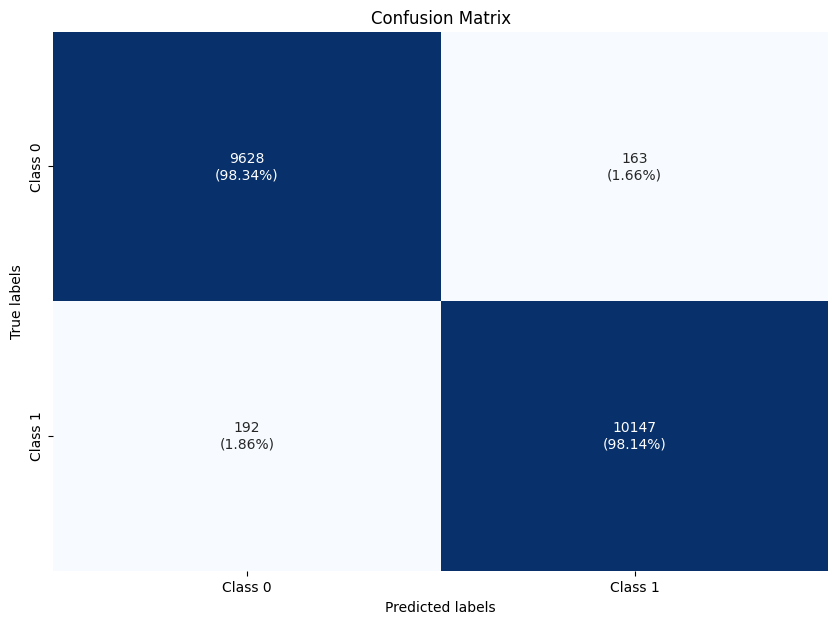

In [ ]:
# prompt: write a code to generate the performance evaluation for the ensemble model saved in file based on accuracy, precision, recall and f1-score with both value and percentage based confusion matrix
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
# Load the saved ensemble model
ensemble_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/ensemble_model_bilstm_cnn.h5')

# Predict on the test data
predictions = ensemble_model.predict([test_padded, test_padded])
predicted_labels = np.round(predictions)

# Calculate the performance metrics
accuracy = accuracy_score(test_labels, predicted_labels)
f1_score = f1_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels)

# Print the performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')

# Create a confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Normalize the confusion matrix by row (true labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create annotations with both counts and percentages
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_normalized[i, j]
        s = f'{c}\n({p:.2%})'
        annot[i, j] = s

# Plot the confusion matrix with annotations
plt.figure(figsize=(10, 7))
ax = sns.heatmap(cm_normalized, annot=annot, fmt='', cmap='Blues', cbar=False)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Adjust tick labels based on the shape of the confusion matrix
class_names = ['Class {}'.format(i) for i in range(cm.shape[0])]
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

plt.show()


# Prediction Interface

In [37]:
# prompt: write a code to install and import Gradio, to run the function predict_fake_news(text)

!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 31.8 MB/s e

In [38]:
import gradio as gr
import tweepy


# Define a function to update on Twitter
def update_on_Twitter(tweet_text, prediction):
    CONSUMER_KEY = "q76xzfaSG7jL4unpvaNuPM5Ms"
    CONSUMER_SECRET = "7h2JCH9fveW3srWarhCmwLbr8rTtVeJ04Qo3q65VItX2L4eFs1"
    ACCESS_TOKEN = "1636314191198932992-VesD9DTEnagO7fQdCiu5Fh6vuFLbw1"
    ACCESS_TOKEN_SECRET = "DcTCYDGba8UWlbMEpDvmTMZuVI2XAip7Tu8QgLTrC12AW"
    BAERER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAPJjnwEAAAAA3DnqW09w51Oufv8UCReOPQLPUtA%3Dz9vzO4DXVbXRU63RZB3TzbCrBc0saEnQZ49GMmGkDqKVu30qwC"

    # Authenticate to Twitter
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

    # Create an API object
    api = tweepy.API(auth)

    # Create a Client object
    client = tweepy.Client(
      BAERER_TOKEN,
      CONSUMER_KEY,
      CONSUMER_SECRET,
      ACCESS_TOKEN,
      ACCESS_TOKEN_SECRET,
      wait_on_rate_limit=True
    )

    postText = f"The news: {tweet_text} is {prediction}"

    try:
        api.verify_credentials()
        print("Authentication OK")
        client.create_tweet(text=postText)
        return f'<a href="https://twitter.com/CANNBot" target="_blank">Detect Fake News on Twitter Bot Account</a>'
    except Exception as e:
        print(e)
        return f'Error: {e}'

# Use Gradio Blocks to create a more flexible interface
with gr.Blocks() as demo:
    gr.Markdown("# Fake News Detection")
    text_input = gr.Textbox(placeholder="Enter a news Tweet here...", label="News Tweet")
    text_output = gr.Textbox(label="Prediction")
    link_output = gr.HTML(label="Twitter Bot Account")

    # Button to get prediction
    gr.Button("Predict").click(predict_fake_news, inputs=text_input, outputs=text_output)

    # Button to generate a Gradio link
    gr.Button("Detect on Twitter").click(update_on_Twitter, inputs=[text_input, text_output], outputs=link_output)

# Launch the interface
demo.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f02208f8032e00faae.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
